# Basic Liner Regression Using Scikit-Learn

In [130]:
"""
cd .\08linear_regression_i_scikit\
jupyter nbconvert --to markdown lin_r.ipynb --output README.md
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')


## Prepare Data

In [2]:
data = pd.read_csv("weight-height.csv")
data.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


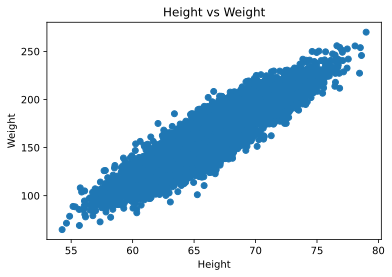

In [32]:
plt.scatter(x=data['Height'], y=data["Weight"])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()


### Prepare X and Y data

In [24]:
# x = data['Height']
x = data.iloc[:, 1]
y = data.iloc[:, 2]
print("Shape:", x.shape, y.shape)
print("Dimension:", x.ndim, y.ndim)

Shape: (10000,) (10000,)
Dimension: 1 1


### What should be the shape of the data??

In [12]:
from sklearn.linear_model import LinearRegression
alg = LinearRegression()
alg.fit?

Signature: alg.fit(X, y, sample_weight=None)
Docstring:
Fit linear model.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Training data

y : array-like of shape (n_samples,) or (n_samples, n_targets)
    Target values. Will be cast to X's dtype if necessary

sample_weight : array-like of shape (n_samples,), default=None
    Individual weights for each sample

    .. versionadded:: 0.17
       parameter *sample_weight* support to LinearRegression.

Returns
-------
self : returns an instance of self.
File:      c:\users\soiko\anaconda3\lib\site-packages\sklearn\linear_model\_base.py
Type:      method


Here `X : {array-like, sparse matrix} of shape (n_samples, n_features)`, so `X` is a matrix of features (2D matrix. 
But our data is a  1D array `(n,)`, if we try to fit a linear regression model to this data, we will get an error.

In [ ]:
"""  
ValueError: Expected 2D array, got 1D array instead:
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
"""

so we need to reshape it to a matrix `(n,1)`.

### Reshape the data from `1D` to `2D` or `(n,)` to `(n,1)`

#### 1️⃣ Both `X`,`Y` as `pd.DataFrame` format

The process includes: 

1. Converting `pd.DataFrame` -->`np.Array` using `pd.DataFrame.values`
2. Reshape the data from `(n,)` to `(n,1)` using `np.reshape(n,1)` or `np.reshape(-1,1)`
3. Then Again Converting `np.Array` -->`pd.DataFrame` using `pd.DataFrame(np.array)`

In [17]:
x = data.iloc[:, 1].reshape(-1, 1) # (n,1)

AttributeError: 'Series' object has no attribute 'reshape'

> But this is not a numpy array, so we need to convert it to a numpy array.

In [27]:
# convert series object into array
np_arr = x.values

# reshaping series
reshaped_np_arr = np_arr.reshape(-1,1)
x= reshaped_np_arr
reshaped_np_arr.shape



(10000, 1)

In [65]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y)
print(X_train.shape)
print("X_train type:", type(X_train))
print("X_train type:", type(X_test))
print("y_train type:", type(y_train))
print("y_test type:", type(y_test))


(7500, 1)
X_train type: <class 'numpy.ndarray'>
X_train type: <class 'numpy.ndarray'>
y_train type: <class 'pandas.core.series.Series'>
y_test type: <class 'pandas.core.series.Series'>


To avoid confusion: convert X to a pandas Object:

In [62]:
df = pd.DataFrame(x)
df.head()

,0
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [63]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(df, y)
X_train.shape

(7500, 1)

In [64]:
print("X_train type:", type(X_train))
print("X_train type:", type(X_test))
print("y_train type:", type(y_train))
print("y_test type:", type(y_test))


X_train type: <class 'pandas.core.frame.DataFrame'>
X_train type: <class 'pandas.core.frame.DataFrame'>
y_train type: <class 'pandas.core.series.Series'>
y_test type: <class 'pandas.core.series.Series'>


#### 2️⃣ Both `X`,`Y` as `np.Array` format

In [70]:
X = data.iloc[:, 1].values
X = X.reshape(-1, 1)
y = data.iloc[:, 2].values

In [71]:
print("Shape:", X.shape, y.shape)

Shape: (10000, 1) (10000,)


In [72]:
print("Type:", type(X), type(y))

Type: <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [73]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y)
print(X_train.shape)
print("X_train type:", type(X_train))
print("X_train type:", type(X_test))
print("y_train type:", type(y_train))
print("y_test type:", type(y_test))

(7500, 1)
X_train type: <class 'numpy.ndarray'>
X_train type: <class 'numpy.ndarray'>
y_train type: <class 'numpy.ndarray'>
y_test type: <class 'numpy.ndarray'>


1️⃣ Both `X`,`Y` as `pd.DataFrame` format - **Shortcut**

In [126]:
# not V = data["Height"]
V = data[["Height"]]
V.shape


(10000, 1)

## Train the Model

In [75]:
from sklearn.linear_model import LinearRegression
alg = LinearRegression()
alg.fit(X_train, y_train)


LinearRegression()

In [76]:
m = alg.coef_
m

array([7.71990524])

In [77]:
c = alg.intercept_
c

-350.8464117098158

## Predict

In [116]:
no = np.random.randint(1,1000)
no

120

In [117]:
X_test_1 = X_test[no]
print("Height:", X_test_1)

Height: [68.16583681]


In [118]:
Y_test_1 = y_test[no]
print("Weight:", Y_test_1)


Weight: 173.456455329526


In [119]:
y_pred = c + m * X_test_1
print("Predicted Weight:", y_pred)


Predicted Weight: [175.38738901]


In [91]:
X_test_1 = X_test[0]
X_test_2 = X_test[1]
X_test_3 = X_test[2]

print("Height:", X_test_1)
print("Weight:", X_test_2)
print("Height:", X_test_3)


Height: [64.16181757]
Weight: [65.98761029]
Height: [65.72858019]


In [93]:
Y_test_1 = y_test[0]
Y_test_2 = y_test[1]
Y_test_3 = y_test[2]
print("Weight:", Y_test_1)
print("Weight:", Y_test_2)
print("Weight:", Y_test_3)


Weight: 157.909028738342
Weight: 166.844114319683
Weight: 137.839895869937


In [94]:
y_pred = alg.predict([X_test_1, X_test_2, X_test_3])
y_pred

array([144.47673989, 158.57168667, 156.57199884])

## Score the model

In [122]:
alg.score(X_test, y_test)

0.855872170745217

## Plot

Min Height: 54.2631333250971
Max Height: 78.9987423463896
[54.26313333 54.36313333 54.46313333 54.56313333 54.66313333] [78.56313333 78.66313333 78.76313333 78.86313333 78.96313333]


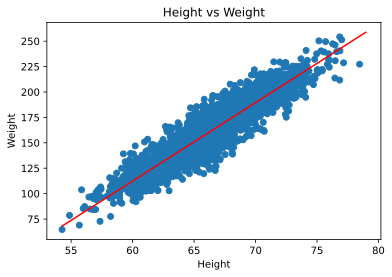

In [129]:
min_X = np.min(X)
print("Min Height:", min_X)
max_X = np.max(X)
print("Max Height:", max_X)

x_line = np.arange(min_X, max_X, 0.1)
print(x_line[:5], x_line[-5:])

y_line = m*x_line + c

plt.plot(x_line, y_line, "r")
# plt.scatter(x=data['Height'], y=data["Weight"])
plt.scatter(x=X_test, y=y_test)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()
